In [45]:
%pip install lxml
import pandas as pd

%pip install seaborn
import seaborn as sns

%pip install matplot
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("mp_data1.csv")
df.head(30)

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
0,4549,Wecome0,canvas.Screen,0,timeout,493.6,1601.9,1596.916,1600.1,2077.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4549,Wecome1,canvas.Screen,1,timeout,492.2,2080.9,2077.600,2093.7,2569.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4549,Wecome2,canvas.Screen,2,timeout,494.0,2571.2,2569.500,2585.9,3063.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4549,Wecome3,canvas.Screen,3,timeout,508.6,3065.5,3063.000,3079.9,3572.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4549,Instructions1,canvas.Screen,4,response,22964.5,3573.9,3572.500,3588.5,26553.0,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4549,Instructions 1a,canvas.Screen,5,response,11462.3,26562.8,26563.374,26580.4,38042.7,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4549,Instructions2,canvas.Screen,6,response,4469.2,38050.3,38046.800,38067.2,42536.4,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4549,Instructions3,canvas.Screen,7,response,7697.3,42544.9,42534.900,42556.0,50253.3,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4549,Instructions4,canvas.Screen,8,response,2639.8,50262.0,50272.358,50278.6,52918.4,...,NaN,keypress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4549,Instructions5,canvas.Screen,9,response,6446.7,52926.0,52912.900,52939.8,59386.5,...,NaN,keypress(Space),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Cleaning data:
#Remove welcome - We only wanan know the reponsetime of the target words
#Reatin rows where sender = "target"
df = df[df['sender'] == 'target']
df.head(20)

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
14,4549,target,canvas.Screen,10_0_4,response,840.0,60076.1,60070.4,60085.5,60925.5,...,response_natural,keypress(n),snjghf,SHEEP,practice,practice,practice,n,n,False
20,4549,target,canvas.Screen,10_1_4,response,643.3,61641.0,61635.1,61650.9,62294.2,...,response_natural,keypress(n),abjdhjs,HORSE,practice,practice,practice,n,n,False
26,4549,target,canvas.Screen,10_2_4,response,782.7,62991.0,62985.4,63000.4,63783.1,...,response_manmade,keypress(m),nvoiuh,HOUSE,practice,practice,practice,m,m,False
32,4549,target,canvas.Screen,10_3_4,response,839.9,64501.5,64499.8,64513.8,65353.7,...,response_manmade,keypress(m),iweonf,BOAT,practice,practice,practice,m,m,False
41,4549,target,canvas.Screen,12_0_0_0_5,response,742.4,67989.8,67987.1,67997.8,68740.2,...,response_manmade,keypress(m),desk,CANDY,Inc_Synth_Synth,long,incongruent,m,m,False
48,4549,target,canvas.Screen,12_0_0_1_5,response,861.8,69510.8,69507.9,69519.9,70381.7,...,response_natural,keypress(n),shark,HILL,Inc_Nat_Nat,long,incongruent,m,m,False
55,4549,target,canvas.Screen,12_0_0_2_5,response,725.9,71152.0,71148.9,71161.3,71887.2,...,response_natural,keypress(n),peas,PEAS,Con_Nat,long,congruent,n,n,False
62,4549,target,canvas.Screen,12_0_0_3_5,response,796.7,72671.6,72666.9,72680.7,73477.4,...,response_natural,keypress(n),plum,PLUM,Con_Nat,long,congruent,n,n,False
69,4549,target,canvas.Screen,12_0_0_4_5,response,815.1,74261.2,74258.2,74271.4,75086.5,...,response_manmade,keypress(m),deck,PLATE,Inc_Synth_Synth,long,incongruent,m,m,False
76,4549,target,canvas.Screen,12_0_0_5_5,response,673.5,75869.0,75866.7,75878.6,76552.1,...,response_manmade,keypress(m),bell,WHEEL,Inc_Synth_Synth,long,incongruent,m,m,False


In [9]:
#Find all unique words in 'sender'-column
set(df['sender']) #There is only 'target' as we wanted

{'target'}

In [10]:
#response_action is the key they pressed
#correct_response is the correct response
#Make response_action only contain the key they reponded

df['response_action'] = df['response_action'].str.replace('keypress(', '')
df['response_action'] = df['response_action'].str.replace(')', '')
df.head()

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
14,4549,target,canvas.Screen,10_0_4,response,840.0,60076.1,60070.4,60085.5,60925.5,...,response_natural,n,snjghf,SHEEP,practice,practice,practice,n,n,False
20,4549,target,canvas.Screen,10_1_4,response,643.3,61641.0,61635.1,61650.9,62294.2,...,response_natural,n,abjdhjs,HORSE,practice,practice,practice,n,n,False
26,4549,target,canvas.Screen,10_2_4,response,782.7,62991.0,62985.4,63000.4,63783.1,...,response_manmade,m,nvoiuh,HOUSE,practice,practice,practice,m,m,False
32,4549,target,canvas.Screen,10_3_4,response,839.9,64501.5,64499.8,64513.8,65353.7,...,response_manmade,m,iweonf,BOAT,practice,practice,practice,m,m,False
41,4549,target,canvas.Screen,12_0_0_0_5,response,742.4,67989.8,67987.1,67997.8,68740.2,...,response_manmade,m,desk,CANDY,Inc_Synth_Synth,long,incongruent,m,m,False


In [13]:
df['correct'] = df['response_action'] == df['correct_response']
df.head()

,ID,sender,sender_type,sender_id,ended_on,duration,time_run,time_render,time_show,time_end,...,response,response_action,prime,target,condition,soa_condition,congruence,correct_response,correctResponse,correct
14,4549,target,canvas.Screen,10_0_4,response,840.0,60076.1,60070.4,60085.5,60925.5,...,response_natural,n,snjghf,SHEEP,practice,practice,practice,n,n,True
20,4549,target,canvas.Screen,10_1_4,response,643.3,61641.0,61635.1,61650.9,62294.2,...,response_natural,n,abjdhjs,HORSE,practice,practice,practice,n,n,True
26,4549,target,canvas.Screen,10_2_4,response,782.7,62991.0,62985.4,63000.4,63783.1,...,response_manmade,m,nvoiuh,HOUSE,practice,practice,practice,m,m,True
32,4549,target,canvas.Screen,10_3_4,response,839.9,64501.5,64499.8,64513.8,65353.7,...,response_manmade,m,iweonf,BOAT,practice,practice,practice,m,m,True
41,4549,target,canvas.Screen,12_0_0_0_5,response,742.4,67989.8,67987.1,67997.8,68740.2,...,response_manmade,m,desk,CANDY,Inc_Synth_Synth,long,incongruent,m,m,True


In [14]:
set(df['correct'])

{False, True}

In [19]:
list(df)

['ID',
 'sender',
 'sender_type',
 'sender_id',
 'ended_on',
 'duration',
 'time_run',
 'time_render',
 'time_show',
 'time_end',
 'time_commit',
 'timestamp',
 'time_switch',
 'response',
 'response_action',
 'prime',
 'target',
 'condition',
 'soa_condition',
 'congruence',
 'correct_response',
 'correctResponse',
 'correct']

In [20]:
#The columns I want in my dataframe: ID, duration, condition, soa_condition, correct
data = df.loc[:, ['ID', 'duration', 'condition', 'soa_condition', 'correct', 'congruence']]
data.head()

,ID,duration,condition,soa_condition,correct,congruence
14,4549,840.0,practice,practice,True,practice
20,4549,643.3,practice,practice,True,practice
26,4549,782.7,practice,practice,True,practice
32,4549,839.9,practice,practice,True,practice
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent


In [22]:
#Remove the rows where condition is practice
data = data[data['condition'] != 'practice']
data.head(30)

,ID,duration,condition,soa_condition,correct,congruence
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent
48,4549,861.8,Inc_Nat_Nat,long,False,incongruent
55,4549,725.9,Con_Nat,long,True,congruent
62,4549,796.7,Con_Nat,long,True,congruent
69,4549,815.1,Inc_Synth_Synth,long,True,incongruent
76,4549,673.5,Inc_Synth_Synth,long,True,incongruent
83,4549,1158.1,Con_Nat,long,True,congruent
90,4549,1092.2,Inc_Nat_Synth,long,True,incongruent
97,4549,853.4,Inc_Synth_Nat,long,True,incongruent
104,4549,910.4,Con_Synth,long,True,congruent


<Axes: xlabel='soa_condition', ylabel='duration'>

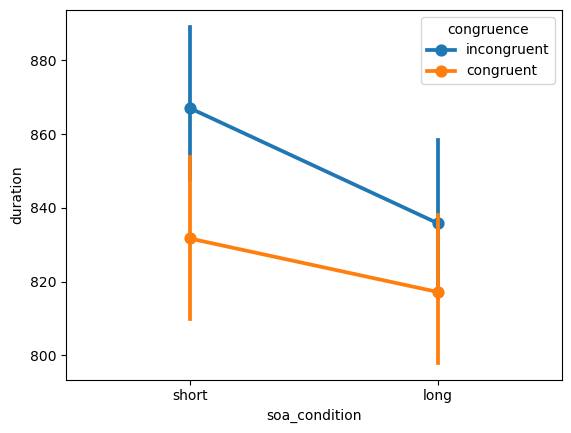

In [37]:
#Make a figure visualisation of the data
#Pointplot using seaborn package
sns.pointplot(data=data, x="soa_condition", y="duration", hue="congruence", order=["short", "long"])


In [29]:
#Now only looking at the data that is correct in repsonse
data = data[data["correct"] == True]
data.head()

,ID,duration,condition,soa_condition,correct,congruence
41,4549,742.4,Inc_Synth_Synth,long,True,incongruent
55,4549,725.9,Con_Nat,long,True,congruent
62,4549,796.7,Con_Nat,long,True,congruent
69,4549,815.1,Inc_Synth_Synth,long,True,incongruent
76,4549,673.5,Inc_Synth_Synth,long,True,incongruent


AttributeError: module 'matplotlib.pyplot' has no attribute 'ylab'

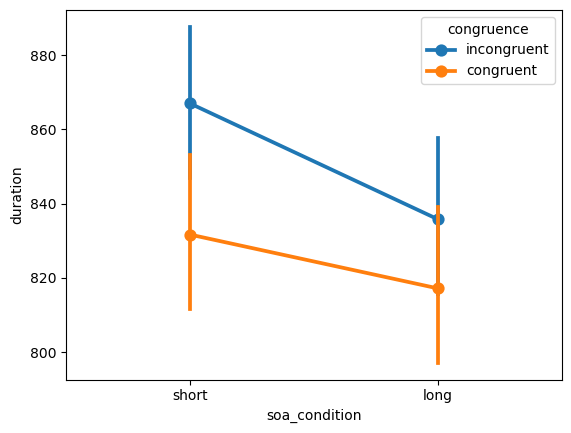

In [43]:
#Doing the same visualisation to see whther there is a difference when correct = True or when correct contain both True and False
sns.pointplot(data=data, x="soa_condition", y="duration", hue="congruence", order=["short", "long"])
plt.ylab("RT (ms)")
plt.xlab("SOA Condition")
plt.title("my awesome plot")

/tmp/ipykernel_409/2188402406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["duration"])


<Axes: xlabel='duration', ylabel='Density'>

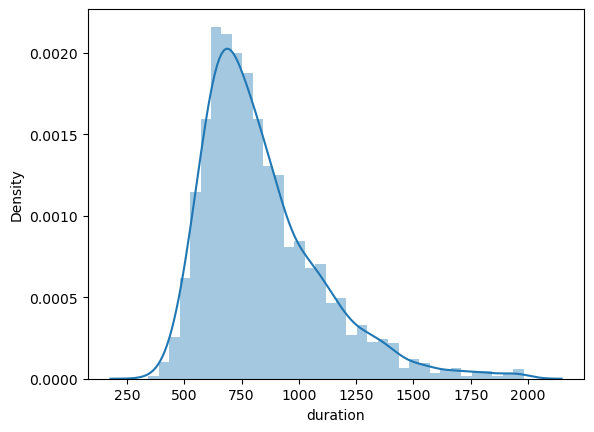

In [34]:
sns.distplot(data["duration"]) #yayy